In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.drop(['Loan_ID'],axis =1,inplace=True)

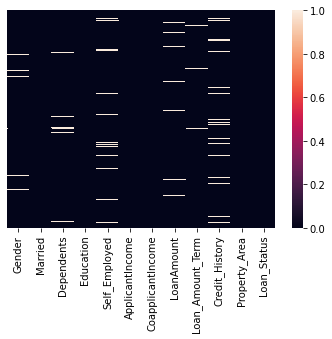

In [6]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = True)

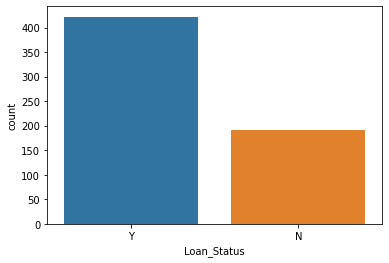

In [7]:
sns.countplot(x='Loan_Status',data = df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
print(df.Gender.unique())
print(df.Married.unique())
print(df.Dependents.unique())
print(df.Self_Employed.unique())
print(df.LoanAmount.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

In [11]:
print(df.Education.unique())
print(df.Property_Area.unique())

['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']


In [12]:
df['Property_Area'].replace('Rural',0,inplace=True) 
df['Property_Area'].replace('Semiurban',1,inplace=True) 
df['Property_Area'].replace('Urban',2,inplace=True) 

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [15]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
# df['Property_Area']=le.fit_transform(df['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849,0.0,146.412162,360.0,1.0,2,Y
1,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,N
2,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,Y
3,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,Y
4,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2,Y


In [17]:
le1 = LabelEncoder()
df['Loan_Status']=le1.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849,0.0,146.412162,360.0,1.0,2,1
1,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,0
2,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,1
3,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,1
4,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
df1 = pd.get_dummies(df['Gender'],drop_first=True)
df.drop(['Gender'],axis=1,inplace=True)
df1.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [19]:
df2 = pd.get_dummies(df['Married'],drop_first=True)
df.drop(['Married'],axis=1,inplace=True)
df2.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [20]:
# df3 = pd.get_dummies(df['Dependents'],drop_first=True)
# df.drop(['Dependents'],axis=1,inplace=True)
# df3.head()

df['Dependents'].replace('3+',4,inplace=True) 

In [21]:
df4 = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df4.head()

,Yes
0,0
1,0
2,1
3,0
4,0


In [22]:
df=pd.concat([df1,df2,df4,df],axis=1)

In [23]:
df.head()

,Male,Yes,Yes,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,0,0,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head(5)

,Male,Yes,Yes,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,1,0,0,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,1,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [25]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
log_class.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = log_class.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[15 18]
 [ 3 87]]
Accuracy: 0.8292682926829268
Precision: 0.829849012775842
Recall: 0.8292682926829268
F1 score: 0.81072729279329


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
y_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[16 17]
 [ 6 84]]
Accuracy: 0.8130081300813008
Precision: 0.8036706109635354
Recall: 0.8130081300813008
F1 score: 0.7996935257310688


In [34]:
df.shape

(614, 12)

In [35]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [36]:
# Implementing XGBOOST Algorithm
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [37]:
xgb_class=xgboost.XGBClassifier()

In [38]:
random_search=RandomizedSearchCV(xgb_class,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [39]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
xgb_class=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
y_pred = xgb_class.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[14 19]
 [ 3 87]]
Accuracy: 0.8211382113821138
Precision: 0.8214991472889202
Recall: 0.8211382113821138
F1 score: 0.7998208063713289


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
y_pred = gnb.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[15 18]
 [ 3 87]]
Accuracy: 0.8292682926829268
Precision: 0.829849012775842
Recall: 0.8292682926829268
F1 score: 0.81072729279329


In [47]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear', random_state = 0)
svm_class.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [48]:
y_pred = svm_class.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[14 19]
 [ 2 88]]
Accuracy: 0.8292682926829268
Precision: 0.836534077957602
Recall: 0.8292682926829268
F1 score: 0.8070181644528556


In [50]:
from sklearn.svm import SVC
rbf_kernel = SVC(kernel = 'rbf', random_state = 0)
rbf_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [51]:
y_pred = rbf_kernel.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[14 19]
 [ 3 87]]
Accuracy: 0.8211382113821138
Precision: 0.8214991472889202
Recall: 0.8211382113821138
F1 score: 0.7998208063713289


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
y_pred = knn_class.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[18 15]
 [10 80]]
Accuracy: 0.7967479674796748
Precision: 0.7886484503942784
Recall: 0.7967479674796748
F1 score: 0.7911646152349872


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [57]:
y_pred = dtc.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[22 11]
 [15 75]]
Accuracy: 0.7886178861788617
Precision: 0.797642225322316
Recall: 0.7886178861788617
F1 score: 0.79225530566994


In [59]:
# Collecting the test data to be predicted
test_df=pd.read_csv('/content/sample_data/new_test.csv')

In [60]:
test_df.shape

(367, 11)

In [61]:
test_df = sc.transform(test_df)

In [62]:
y_pred = log_class.predict(test_df)

In [63]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [64]:
y_pred = le1.inverse_transform(y_pred)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [65]:
##Create Sample Submission file and Submit using XgBOOST
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/content/sample_data/sample_submission.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('/content/sample_data/sample_submission.csv',index=False)